In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import fitz  # PyMuPDF
import uuid # for generating unique identifiers for each paper

In [2]:
# Base path to folder where output files will be stored
output_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/database_analysis_output/outputs/'

# Base path to folders 
base_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/'

# Path to the MICCAI 2023 pdfs
pdf_path = base_path + 'miccai_2023/'

# Path to the MICCAI 2023 database of all 730 papers and their metadata
database_path = base_path + 'databases/'

In [4]:
agg_results_df = pd.read_csv(base_path + 'code/database_analysis_output/finals/results_df_aggregated.csv').drop(columns=['Unnamed: 0'])
agg_results_df

,title,total_score,requires_review,age,gender,geolocation,social factors,ethnicity,fairness,data_gaps
0,3D Arterial Segmentation via Single 2D Project...,0,False,0,3,1,0,0,0,0
1,3D Mitochondria Instance Segmentation with Spa...,0,False,0,0,0,0,0,0,0
2,A Spatial-Temporal Deformable Attention Based ...,0,False,0,0,0,0,0,0,0
3,A Spatial-Temporally Adaptive PINN Framework f...,1,False,1,3,1,0,0,0,0
4,A Texture Neural Network to Predict the Abnorm...,1,False,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,0,False,0,0,0,0,0,6,0
185,Weakly-Supervised Positional Contrastive Learn...,0,False,0,0,0,0,0,0,0
186,X2Vision: 3D CT Reconstruction from Biplanar X...,0,False,0,0,0,0,0,0,0
187,YONA: You Only Need One Adjacent Reference-Fra...,0,False,0,1,0,0,0,1,0


In [6]:
# Plotting the number of category-related keywords in papers 
def plot_category(category, df):
    df[category].value_counts().plot(kind='bar')
    plt.title('Number of Papers Discussing ' + category)
    plt.xlabel('Mentions of ' + category + '-Related Keywords')
    plt.ylabel('Number of Papers')
    plt.show()

In [185]:
# Subplotting the number of category-related keywords in papers
def subplot_categories(categories_to_plot, agg_results_df):
    # Define the number of rows and columns for the subplots based on the number of categories
    num_categories = len(categories_to_plot)
    num_cols = 3  # Choose the number of columns for your subplot grid
    num_rows = num_categories // num_cols + (num_categories % num_cols > 0)

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 3 * num_rows))  # Adjust figsize as necessary
    axs = axs.flatten()  # Flatten the array of axes for easier iteration

    total_papers = len(agg_results_df)  # The total number of papers
    
    # Plot a bar plot for each specified category
    for i, category in enumerate(categories_to_plot):
        # Create the bar plot on the appropriate subplot
        # Note: This assumes each entry in these columns is a count. If not, adjust the plotting code accordingly.
        agg_results_df[category].value_counts().sort_index().plot(kind='bar', ax=axs[i], title=category.capitalize(), color='skyblue')
        axs[i].set_xlabel('Mentions of ' + category + '-related keywords')
        axs[i].set_xticks(ticks=[0, 1], labels=['No', 'Yes']) # Customize the x-axis tick labels

        axs[i].set_ylabel('Number of Papers')
        axs[i].set_ylim(0, 200)  # Adjust y-axis limits as necessary
        axs[i].set_title('Number of papers discussing ' + '|' + category + '|', fontsize=10, fontweight='bold', color='white', loc='center', pad=10, weight='bold')
    
        # Add a horizontal line at the total number of papers
        axs[i].axhline(y=total_papers, color='r', linestyle='--', label='papers in total')

        # Add legend to the subplot
        axs[i].legend(loc='lower left', fontsize=8)

    # Hide any unused subplot axes
    for j in range(i + 1, num_rows * num_cols):
        axs[j].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

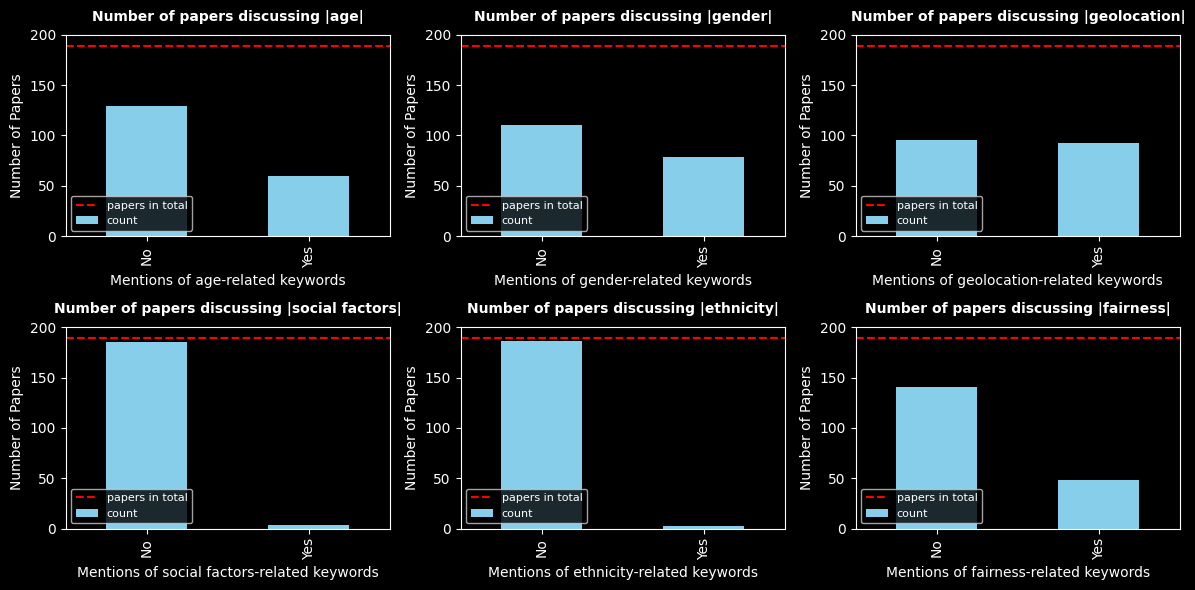

In [186]:
# Specify the categories you want to plot
categories_to_plot = ['age', 'gender', 'geolocation', 'social factors', 'ethnicity', 'fairness']
subplot_categories(categories_to_plot, agg_results_df)

In [28]:
# # This code snippet is ready to run on your local machine. Make sure to replace the df placeholder with your actual DataFrame.
# # Columns to convert to binary
# columns_to_convert = ['age', 'gender', 'geolocation','social factors','ethnicity','fairness','data_gaps']

# # Convert to binary: 1 if the count is greater than 0, else 0
# for column in columns_to_convert:
#     agg_results_df[column] = agg_results_df[column].apply(lambda x: 1 if x > 0 else 0)

# agg_results_df.to_csv(output_path + 'agg_results_df_binary.csv')

In [218]:
def plot_category_percentage(df):    
    # Drop non-category columns
    df_categories = agg_results_df.drop(['title', 'total_score', 'requires_review'], axis=1)

    # Calculate the sum for each category
    category_sums = df_categories.sum()

    # Calculate the percentage for each category
    total_papers = len(agg_results_df)  # The total number of papers
    category_percentages = (category_sums / total_papers) * 100

    # Create a bar plot with percentage values
    category_percentages.plot(kind='bar', stacked=False, color='skyblue').set_ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Keyword Distribution in Selected Papers', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

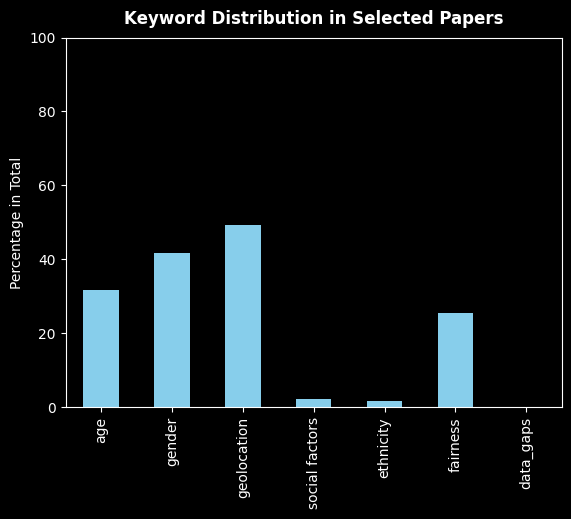

In [219]:
plot_category_percentage(agg_results_df)